In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
creditcard = pd.read_csv("creditcard/creditcard.csv")
len(creditcard)

284807

In [3]:
creditcard.head().T

,0,1,2,3,4
Time,0.000000,0.000000,1.000000,1.000000,2.000000
V1,-1.359807,1.191857,-1.358354,-0.966272,-1.158233
V2,-0.072781,0.266151,-1.340163,-0.185226,0.877737
V3,2.536347,0.166480,1.773209,1.792993,1.548718
V4,1.378155,0.448154,0.379780,-0.863291,0.403034
V5,-0.338321,0.060018,-0.503198,-0.010309,-0.407193
V6,0.462388,-0.082361,1.800499,1.247203,0.095921
V7,0.239599,-0.078803,0.791461,0.237609,0.592941
V8,0.098698,0.085102,0.247676,0.377436,-0.270533
V9,0.363787,-0.255425,-1.514654,-1.387024,0.817739


In [4]:
creditcard.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
creditcard.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

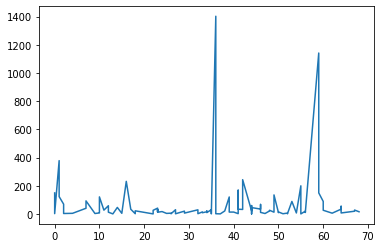

In [6]:
fig,ax = plt.subplots()
plt.plot(creditcard["Time"][:100],creditcard["Amount"][:100])

In [7]:
# split into X-features and y labels 

X = creditcard.drop("Class",axis=1)
y = creditcard["Class"]

# split into training and test 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# create a method with different models and fit and evaluate score with the help pf that method 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

models = {"Logistic-regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random-forest":RandomForestClassifier()}

def fit_and_scores(models,X_train,y_train,X_test,y_test):
    model_score = {}
    for name,model in models.items():
        # fit the model 
        model.fit(X_train,y_train)
        # evaluate scores 
        model_score[name] = model.score(X_test,y_test)
        print(name,f"{model_score[name]*100:.2f}%")
    return model_score

fit_and_scores(models,X_train,y_train,X_test,y_test)

F:\Softwares\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic-regression 99.87%
KNN 99.83%
Random-forest 99.95%


{'Logistic-regression': 0.9987008883115059,
 'KNN': 0.9983146659176293,
 'Random-forest': 0.9995435553526912}

In [52]:
from sklearn.metrics import accuracy_score
models = {"Logistic-regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random-forest":RandomForestClassifier()}

#def show_scores(model):
   # score = {"accuracy":accuracy_score(y_test,y_preds)}

def fit_and_scores(models,X_train,y_train,X_test,y_test):
    model_score = {}
    accuracy ={}
    for name,model in models.items():
        # fit the model 
        model.fit(X_train,y_train)
        # evaluate scores 
       # model_score[name] = model.score(X_test,y_test)
       # print(name,f"{model_score[name]*100:.2f}%")
        # make predictions 
        y_preds = model.predict(X_test)
        accuracy[name]= accuracy_score(y_test,y_preds)

    return model_score

fit_and_scores(models,X_train,y_train,X_test,y_test)

F:\Softwares\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{}

In [10]:
# make predictions 
model = RandomForestClassifier()

model.fit(X_train,y_train)
y_preds = model.predict(X_test)

In [15]:
# predict the probabilities 

y_preds_proba = model.predict_proba(X_test)

preds_positive = y_preds_proba[:,1]

In [18]:
y_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
y_preds_proba

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01]])

In [24]:
# plot roc curve 

from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test,preds_positive)
fpr,tpr

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.75870559e-05, 1.75870559e-05, 1.75870559e-05,
        1.75870559e-05, 1.75870559e-05, 1.75870559e-05, 3.51741119e-05,
        5.27611678e-05, 5.27611678e-05, 5.27611678e-05, 5.27611678e-05,
        7.03482237e-05, 7.03482237e-05, 8.79352796e-05, 1.05522336e-04,
        1.05522336e-04, 1.40696447e-04, 1.58283503e-04, 1.75870559e-04,
        2.11044671e-04, 2.46218783e-04, 2.81392895e-04, 3.16567007e-04,
        3.34154063e-04, 3.69328174e-04, 4.39676398e-04, 4.74850510e-04,
        5.27611678e-04, 5.45198734e-04, 5.80372846e-04, 6.50721069e-04,
        7.56243405e-04, 8.09004573e-04, 9.14526908e-04, 1.10798452e-03,
        1.40696447e-03, 2.07527260e-03, 3.21843123e-03, 6.52479775e-03,
        2.48680971e-02, 1.00000000e+00]),
 array([0.        , 0.08823529, 0.18627451, 0.23529412, 0.30392157,
        0.38235294, 0.4019

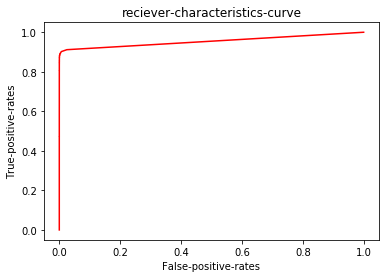

In [30]:
# create a function to plot roc curve 

def roc_curve(fpr,tpr):
    """
    plots the curve between false positive and true positive 
    """
    plt.plot(fpr,tpr,color="red",label="roc")
    plt.xlabel("False-positive-rates")
    plt.ylabel("True-positive-rates")
    plt.title("reciever-characteristics-curve")
    
roc_curve(fpr,tpr)

In [33]:
# confusion matrix 

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_preds)
conf_mat

array([[56856,     4],
       [   22,    80]], dtype=int64)

In [34]:
pd.crosstab(y_test,y_preds,rownames=["Actual-label"],colnames=["Predicted-label"])

Predicted-label,0,1
Actual-label,,
0,56856,4
1,22,80


In [43]:
# plot the confusion matrix using sea born's heat map 

import seaborn as sns 
plt,ax = plt.subplots()
ax = sns.heatmap(conf_mat,
                 annot=True,
                 cbar=False)


TypeError: cannot unpack non-iterable AxesSubplot object

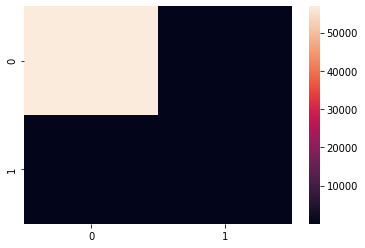

In [45]:
sns.heatmap(conf_mat)

In [54]:
fig,ax = plt.subplots()
ax = sns.heatmap(conf_mat,
                 annot=True,
                 cbar=False)

TypeError: cannot unpack non-iterable AxesSubplot object

In [70]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
def evaluate_score(y_true,y_preds):
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    
    print(f"The accuracy score is{accuracy*100:.2f}%")
    print(f"The precision score is{precision*100:.2f}%")
    print(f"The recall score is{recall*100:.2f}%")
    print(f"The f1 score is{f1*100:.2f}%")

In [71]:
evaluate_score(y_test,y_preds)

ValueError: Found input variables with inconsistent numbers of samples: [42721, 56962]

In [65]:
## split into train valid and test set 

## get the data 

creditcard
X,y

train_split = round(0.7 * len(creditcard))
valid_split = round(train_split + 0.15 * len(creditcard))

X_train,y_train = X[:train_split],y[:train_split]
X_valid,y_valid = X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test = X[valid_split:],y[valid_split:]

In [62]:
(train_split),valid_split

(199365, 242086)

In [66]:
len(X_train),len(y_train),len(X_valid),len(y_valid),len(X_test),len(y_test)

(199365, 199365, 42721, 42721, 42721, 42721)

In [67]:
# predit the valid set 

y_valid_preds = model.predict(X_valid)

In [72]:
# evaluate the score by the method created above 

evaluate_score(y_valid,y_valid_preds)

The accuracy score is99.99%
The precision score is100.00%
The recall score is92.86%
The f1 score is96.30%


Quite easy model has already good scores no need for tuning 